In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


In [2]:
# Load the datasets
data = pd.read_csv('DataSet2.csv')
best_params = pd.read_csv('Best_Parameters_DataSet2.csv')

# Define the target features
targets = ['SHLT', 'MSTOT', 'COGTOT']

# Prepare the input features (exclude 'group' and the target features)
features = data.columns.difference(['group', *targets])
results = []

FileNotFoundError: [Errno 2] No such file or directory: 'feature_importances_Dataset2/feature_importances_0,0,0,0,0_all_targets.png'

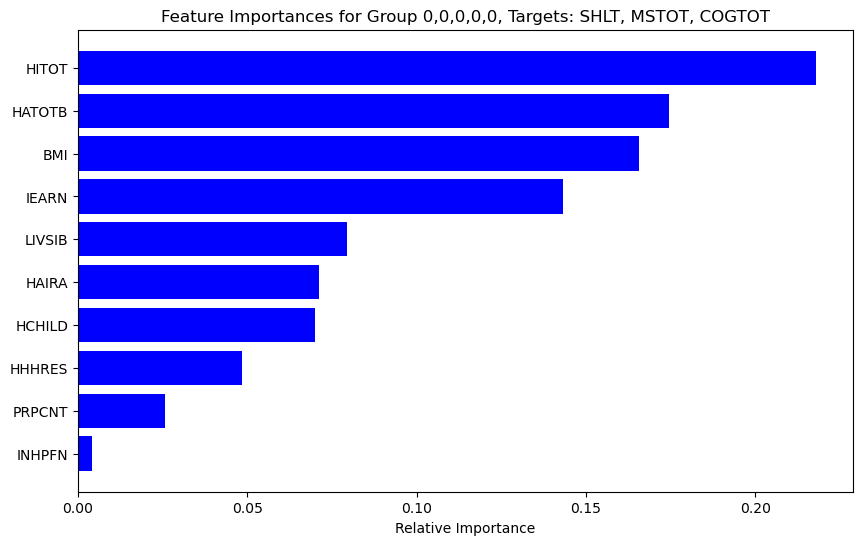

In [3]:
# Loop over each group and train a multioutput model
for _, group_row in best_params.iterrows():
    group_code = group_row['Group']
    group_data = data[data['group'] == group_code]

    if group_data.empty:
        continue

    # Split the group data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(group_data[features], group_data[targets], test_size=0.2, random_state=42)
    
    # Initialize the RandomForestRegressor with parameters from the best_params dataframe
    model = RandomForestRegressor(
        n_estimators=int(group_row['n_estimators']),
        max_depth=None if pd.isna(group_row['max_depth']) else int(group_row['max_depth']),
        min_samples_leaf=int(group_row['min_samples_leaf']),
        min_samples_split=int(group_row['min_samples_split']),
        random_state=42
    )

    # Train the model on all target features at once
    model.fit(X_train, y_train)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate metrics
    y_true = y_test.values
    r2 = r2_score(y_true, predictions, multioutput='variance_weighted')
    rmse = mean_squared_error(y_true, predictions, squared=False)
    mape = mean_absolute_percentage_error(y_true, predictions)

    # Append results
    results.append({
        'Group': params['Group'],
        'R2': r2,
        'RMSE': rmse,
        'MAPE': mape
    })

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('test_dataset1_results.csv', index=False)